<a href="https://colab.research.google.com/github/ayan3b/DATASET/blob/main/Adult_xgboost_target_encoding_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the basic library for EDA

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
from IPython.display import HTML

HTML('''
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import KMeansSMOTE, SMOTE

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from pydotplus import graph_from_dot_data
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc, precision_recall_curve, confusion_matrix


# Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set_style('darkgrid')
random_state = 42

import warnings
warnings.filterwarnings("ignore")

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [91]:
df = pd.read_csv('https://raw.githubusercontent.com/soham0602/MSTHESIS/main/default_credit_data.csv',index_col = 'ID')

In [92]:
df_final = df.copy()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_AMT4  

In [94]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_AMT4  

In [6]:
df.rename(columns={'default payment next month':'DEFAULT'}, inplace=True)

df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# Checking the null value presence
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

## Data Cleanining

In [8]:
df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500
std,129747.661567,0.489129,0.790349,0.521970,9.217904
min,10000.000000,1.000000,0.000000,0.000000,21.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000


In [10]:
df['EDUCATION'].value_counts().sort_index()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64

In [11]:
df['MARRIAGE'].value_counts().sort_index()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64

In [12]:
# remove useless and incorrect information
print(f"Dataset size before:\t{df.shape[0]}")
df = df.drop(df[df['MARRIAGE']==0].index)
df = df.drop(df[df['EDUCATION']==0].index)
df = df.drop(df[df['EDUCATION']==5].index)
df = df.drop(df[df['EDUCATION']==6].index)
print(f"Dataset size after:\t{df.shape[0]}")

Dataset size before:	30000
Dataset size after:	29601


In [14]:
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,-0.014932,-0.131313,-0.163440,-0.218303,-0.263978,-0.287558
std,1.124503,1.199642,1.199793,1.172220,1.136217,1.152206
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [15]:
pay_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for p in pay_features:
    df.loc[df[p]<0, p] = -1
    df.loc[df[p]>=0, p] = df.loc[df[p]>=0, p] + 1
    df[p] = df[p].astype('int64')

In [16]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,29601.000000,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000
mean,50957.432012,48942.189554,4.680320e+04,43122.554204,40235.545184,38858.449816
std,73370.242404,70923.985151,6.912389e+04,64196.383913,60699.344884,59519.893043
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3528.000000,2970.000000,2.652000e+03,2329.000000,1780.000000,1278.000000
50%,22259.000000,21050.000000,2.003500e+04,19005.000000,18091.000000,17118.000000
75%,66623.000000,63497.000000,5.983000e+04,54271.000000,50072.000000,49121.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [17]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000,29601.000000
mean,5649.560319,5.894788e+03,5198.415898,4828.659268,4795.032735,5181.326374
std,16568.264941,2.308919e+04,17580.914806,15711.057992,15244.217154,17657.260739
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.250000e+02,390.000000,298.000000,259.000000,138.000000
50%,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5005.000000,5.000000e+03,4500.000000,4014.000000,4042.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


Data Exploration

In [18]:
df['DEFAULT'].value_counts()

DEFAULT
0    22996
1     6605
Name: count, dtype: int64

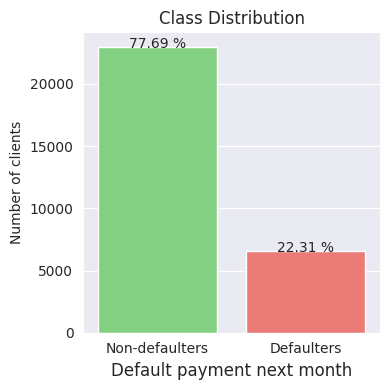

In [20]:
# Class distribution
plt.figure(figsize = (4,4))
graph_target = sns.countplot(x="DEFAULT", data=df, palette=['#77DD76','#FF6962'])

i=0
for p in graph_target.patches:
    height = p.get_height()

    percentage = round(100 * df["DEFAULT"].value_counts()[i] / len(df),2)

    str_plot = f'{percentage} %'

    graph_target.text(p.get_x()+p.get_width()/2., height - 100, str_plot, ha="center")
    i += 1

plt.title('Class Distribution')
plt.xticks([0,1],['Non-defaulters', 'Defaulters'])
plt.xlabel('Default payment next month', fontsize=12)
plt.ylabel('Number of clients')
plt.tight_layout()

# plt.savefig('images/imbalanced_plot.svg')
plt.show()

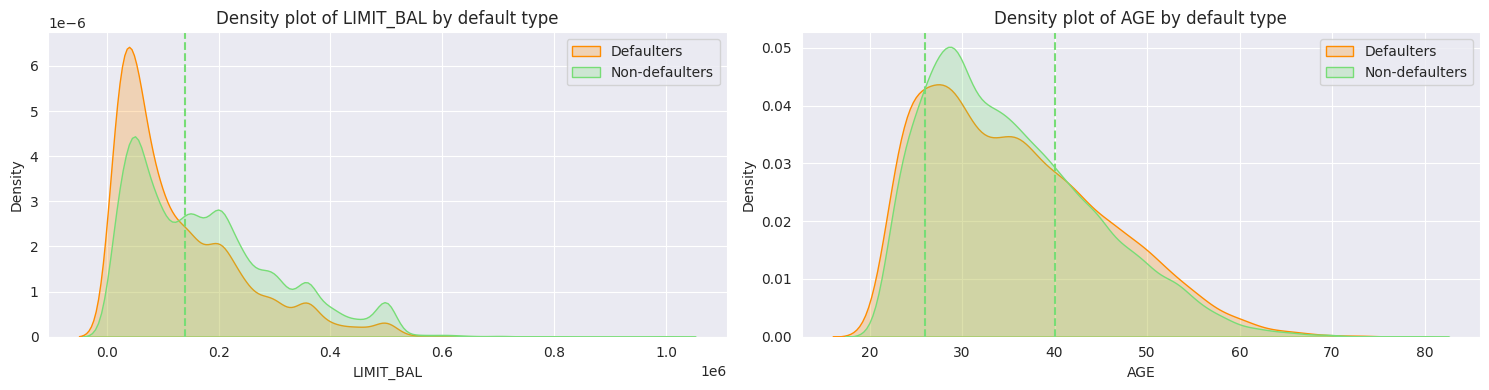

In [22]:
# Kernel density distribution
sns.set_palette(palette=['#77DD76','#FF6962'])
fig, axs = plt.subplots(1, 2, figsize=(15,4))

class_0 = df.loc[df['DEFAULT'] == 0]['LIMIT_BAL']
class_1 = df.loc[df['DEFAULT'] == 1]['LIMIT_BAL']
axs[0].set_title('Density plot of LIMIT_BAL by default type')
sns.kdeplot(class_1, fill=True, label='Defaulters', color='darkorange', ax=axs[0])
sns.kdeplot(class_0, fill=True, label='Non-defaulters', ax=axs[0])
axs[0].axvline(0.14*1e6, 0, ls='--')
axs[0].legend()

class_0 = df.loc[df['DEFAULT'] == 0]['AGE']
class_1 = df.loc[df['DEFAULT'] == 1]['AGE']
axs[1].set_title('Density plot of AGE by default type')
sns.kdeplot(class_1, fill=True, label='Defaulters', color='darkorange', ax=axs[1])
sns.kdeplot(class_0, fill=True, label='Non-defaulters', ax=axs[1])
axs[1].axvline(26, 0, ls='--')
axs[1].axvline(40, 0, ls='--')
axs[1].legend()

fig.tight_layout()
#plt.savefig('images/continuosDistribution.svg')
plt.show()

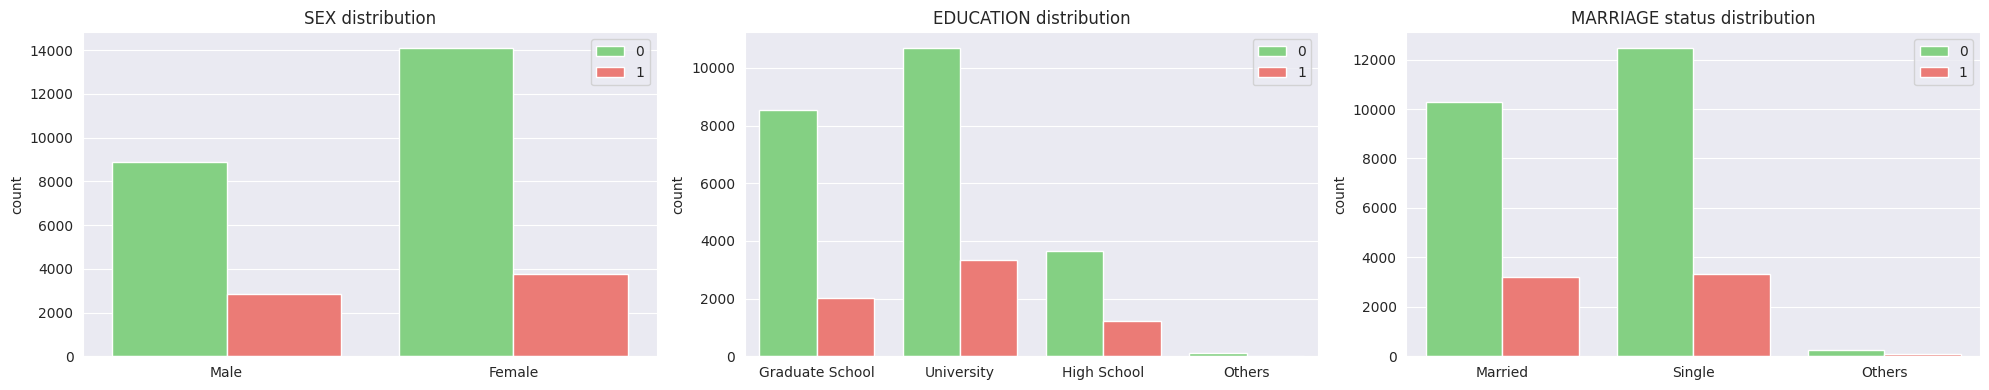

In [23]:
sns.set_palette(palette=['#77DD76','#FF6962'])
fig, axs = plt.subplots(1, 3, figsize=(20,4))

axs[0].set_title('SEX distribution')
sns.countplot(x='SEX', hue='DEFAULT', data=df, ax=axs[0])
axs[0].set_xticklabels(['Male', 'Female'])
axs[0].set_xlabel('')
axs[0].legend()

axs[1].set_title('EDUCATION distribution')
sns.countplot(x='EDUCATION', hue='DEFAULT', data=df, ax=axs[1])
axs[1].set_xticklabels(['Graduate School', 'University', 'High School', 'Others'])
axs[1].set_xlabel('')
axs[1].legend()

axs[2].set_title('MARRIAGE status distribution')
sns.countplot(x='MARRIAGE', hue='DEFAULT', data=df, ax=axs[2])
axs[2].set_xticklabels(['Married', 'Single', 'Others'])
axs[2].set_xlabel('')
axs[2].legend()

fig.tight_layout()
#plt.savefig('images/categoricalDistribution.svg')
plt.show()

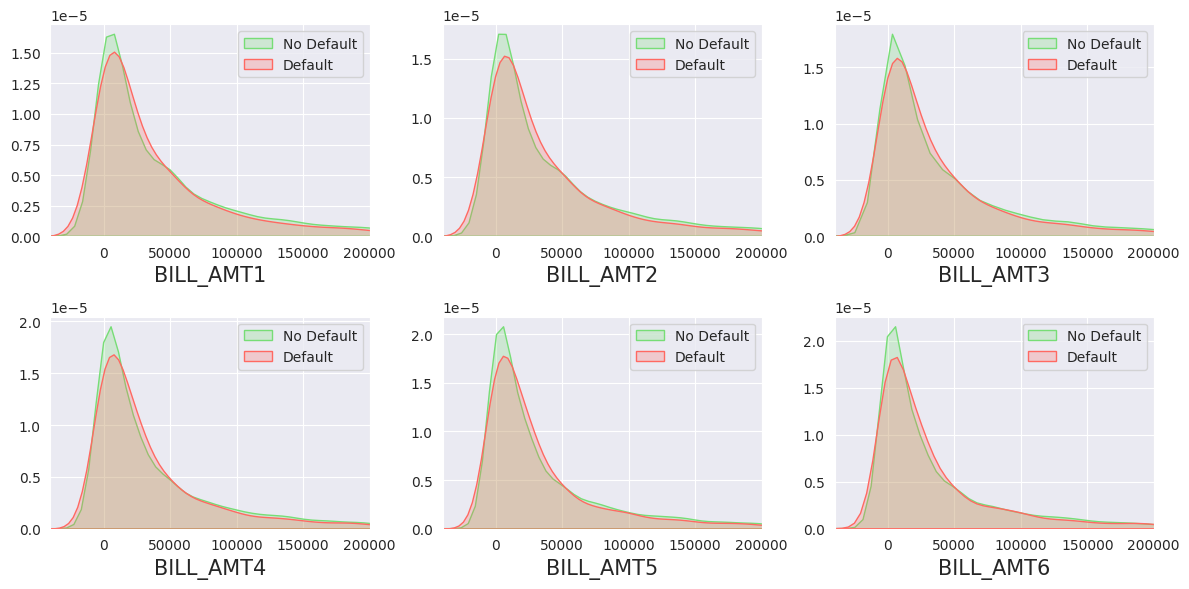

In [28]:
BILL_AMT_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(12,6))

for i,col in enumerate(BILL_AMT_cols):
    plt.subplot(2,3,i + 1)
    sns.kdeplot(df.loc[(df['DEFAULT'] == 0), col], label = 'No Default',color='#77DD76', shade=True)
    sns.kdeplot(df.loc[(df['DEFAULT'] == 1), col], label = 'Default', color='#FF6962', shade=True)
    plt.xlim(-40000,200000)
    plt.ylabel('')
    plt.xlabel(col,fontsize=15)
    plt.legend()
    plt.tight_layout()

#plt.savefig('images/continuousBILLAMT.svg')
plt.show()

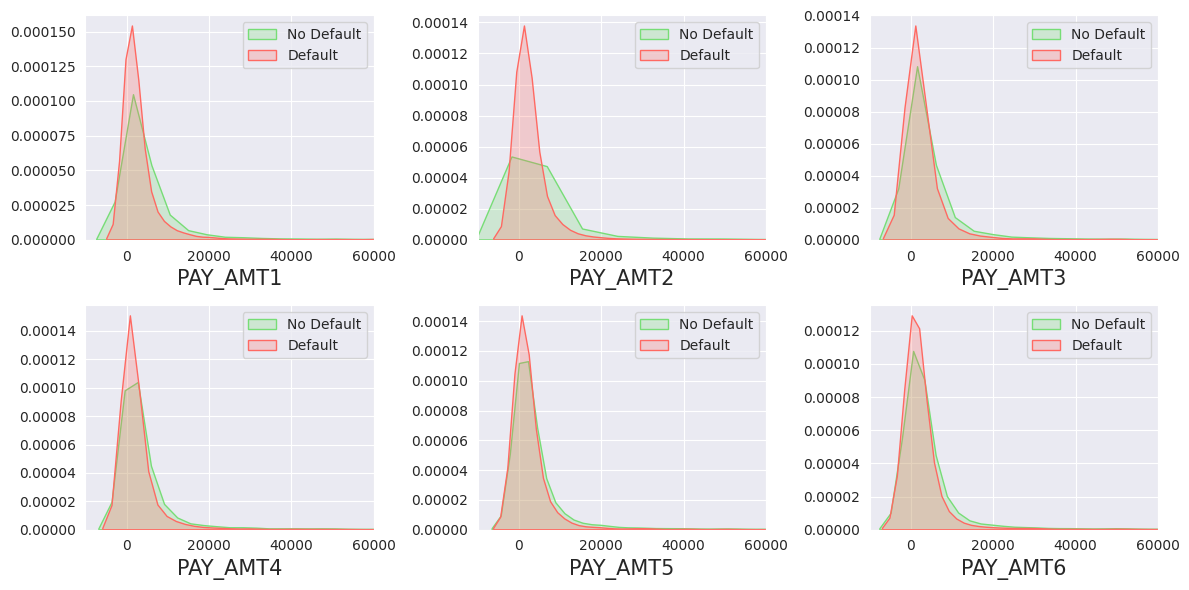

In [31]:
PAY_AMT_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(12,6))

for i,col in enumerate(PAY_AMT_cols):
    plt.subplot(2,3,i + 1)
    sns.kdeplot(df.loc[(df['DEFAULT'] == 0), col], label = 'No Default', shade = True,color='#77DD76')
    sns.kdeplot(df.loc[(df['DEFAULT'] == 1), col], label = 'Default', shade = True, color='#FF6962')
    plt.xlim(-10000,60000)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

#plt.savefig('images/continuousPAYAMT.svg')
plt.show()

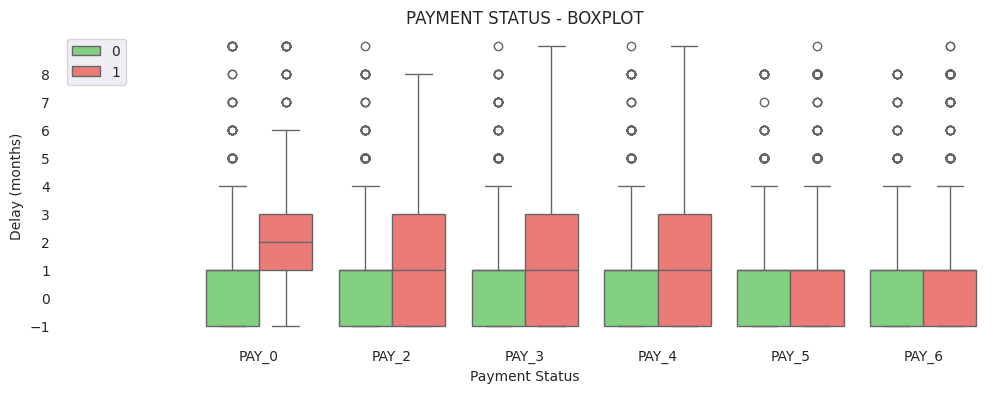

In [30]:
repayment = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DEFAULT']]
repayment = pd.melt(repayment,
                    id_vars="DEFAULT",
                    var_name="Payment Status",
                    value_name='Delay (months)')


plt.figure(figsize=(12,4))
sns.boxplot(y="Delay (months)", x="Payment Status", hue="DEFAULT", data=repayment, palette=sns.color_palette(('#77DD76','#FF6962')))
plt.xlim([-1.5,5.5])
plt.ylim([-1.5,9.5])
plt.yticks(np.arange(-1,9))
plt.title('PAYMENT STATUS - BOXPLOT')
plt.legend()
#plt.savefig('images/BoxplotPAY.svg')
plt.box(False)

Data Correlation Among Features

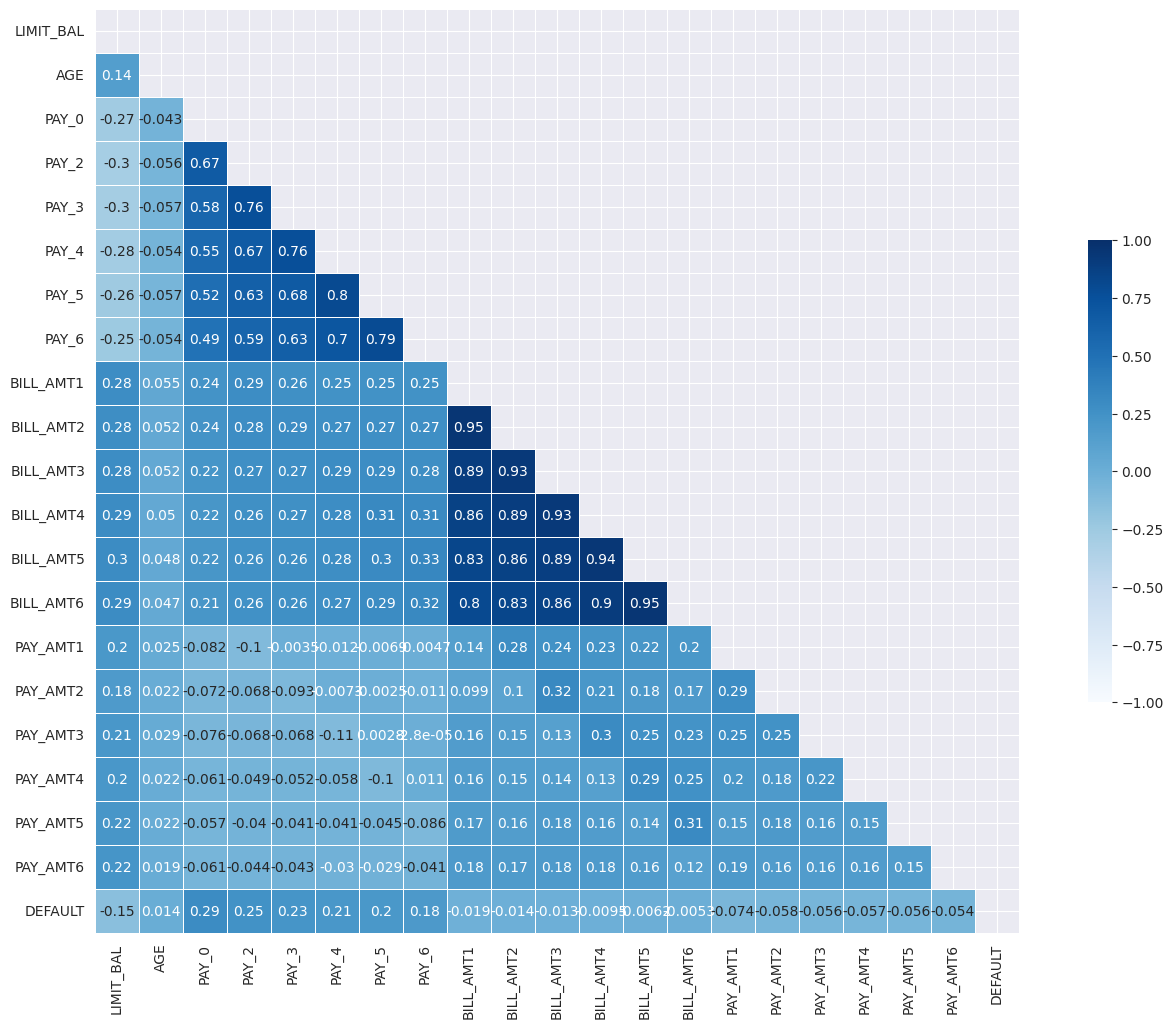

In [33]:
numeric = ['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'DEFAULT']
corr = df[numeric].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18,12))
ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cmap='Blues', cbar_kws={'shrink': .5}, annot=True, annot_kws={'size': 10})
cbar = ax.collections[0].colorbar
#plt.savefig('images/correlation.svg')

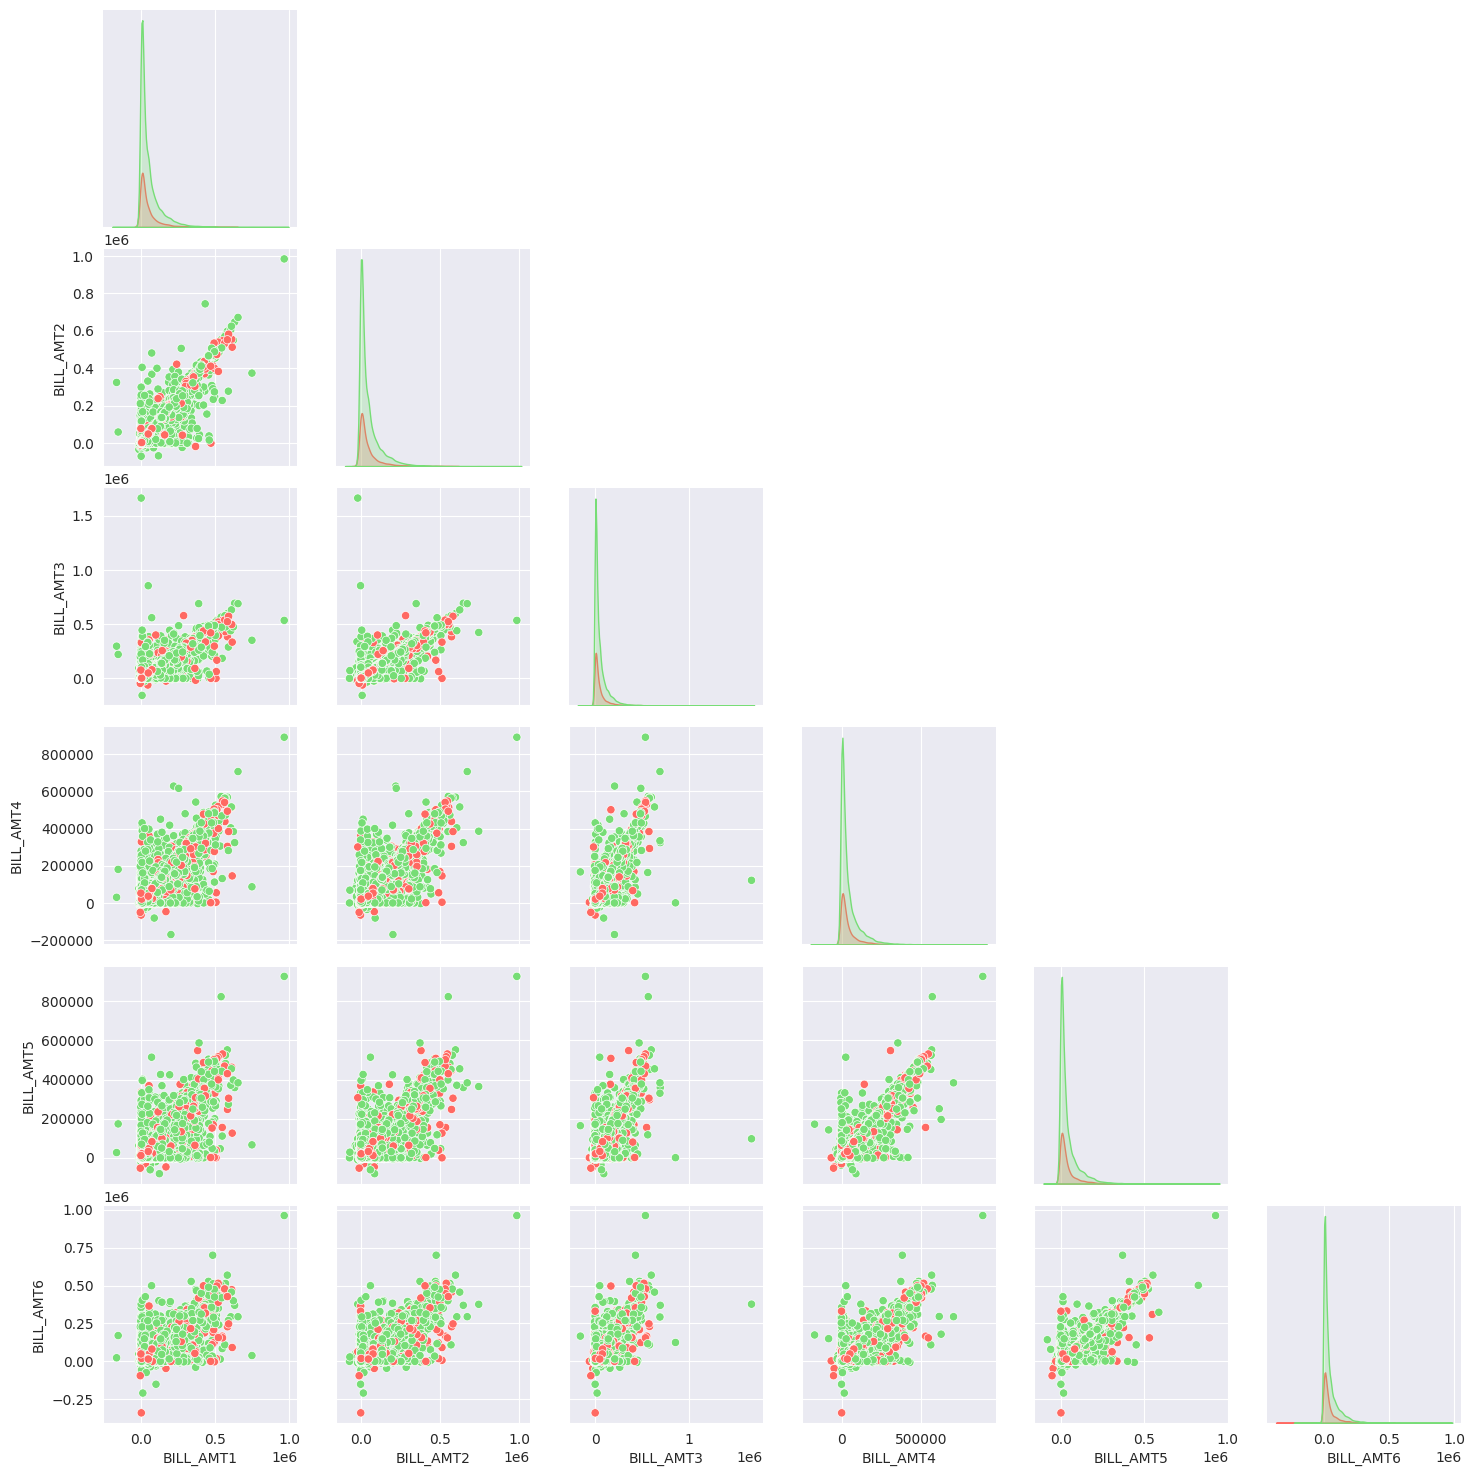

In [34]:
pair_plot = sns.pairplot(df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','DEFAULT']], hue='DEFAULT', diag_kind='kde', corner=True)
pair_plot._legend.remove()

Normality Check

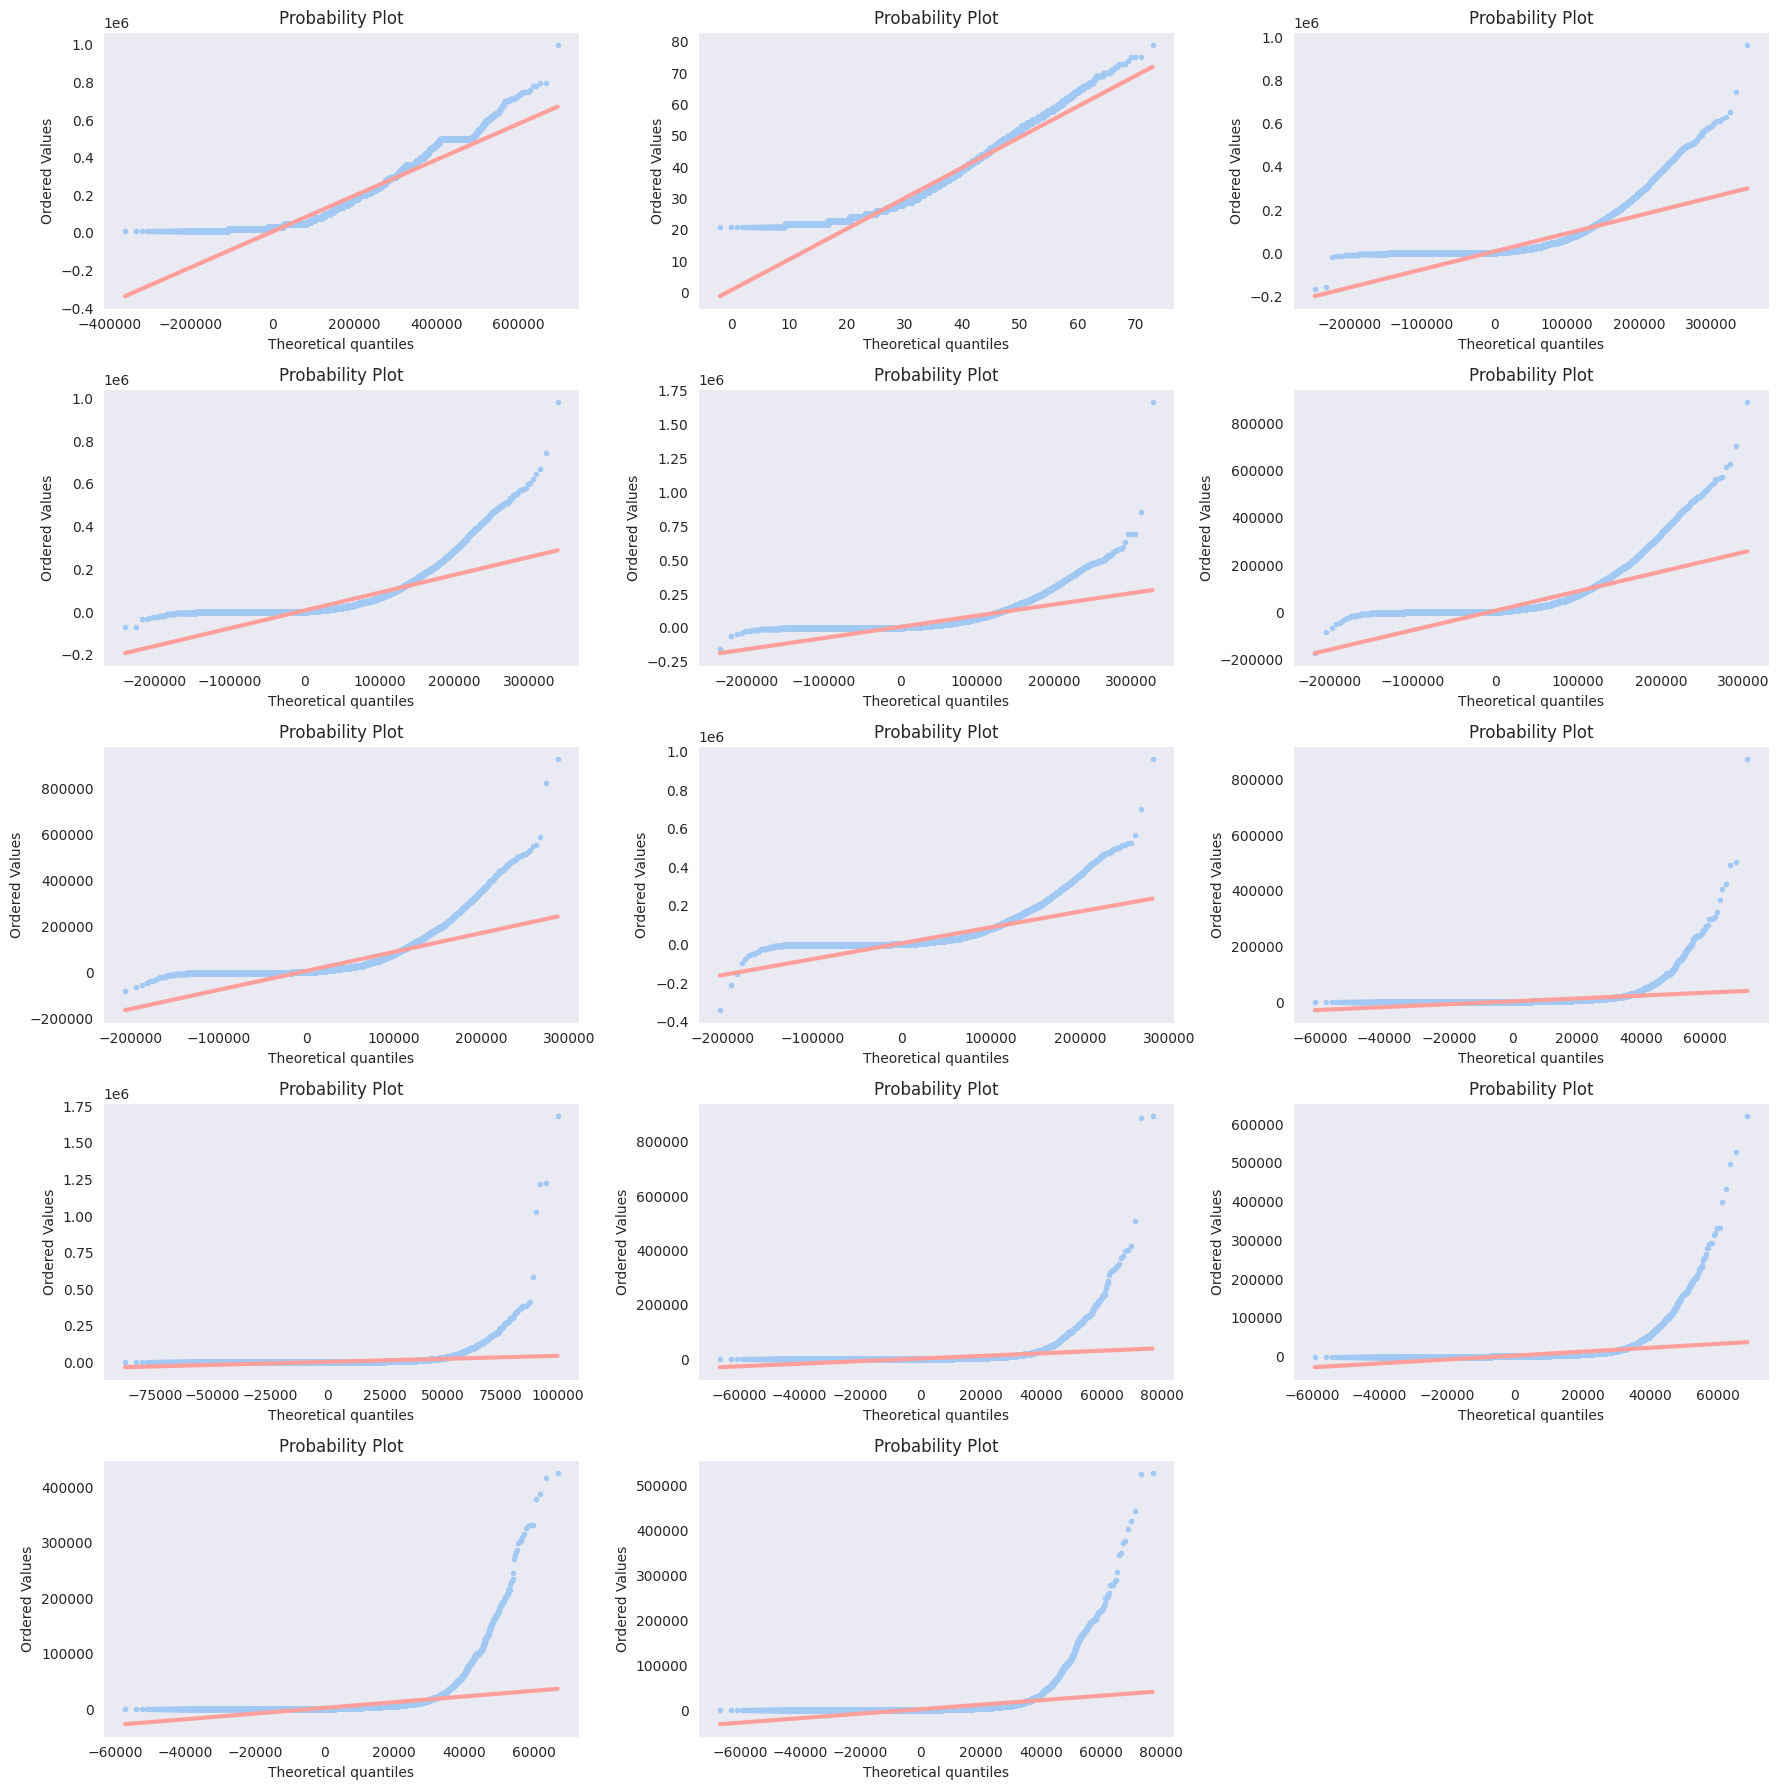

In [35]:
# Check gaussian distribution
sns.set_color_codes('pastel')
fig, axs = plt.subplots(5, 3, figsize=(18,18))

numeric = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
i, j = 0, 0
for f in numeric:
    if j == 3:
        j = 0
        i = i+1
    stats.probplot(df[f],
                   dist='norm',
                   sparams=(df[f].mean(), df[f].std()),
                   plot=axs[i,j])
    axs[i,j].get_lines()[0].set_marker('.')

    axs[i,j].grid()
    axs[i,j].get_lines()[1].set_linewidth(3.0)
    j = j+1

fig.tight_layout()
axs[4,2].set_visible(False)
#plt.savefig('images/QQplot.png')
plt.show()

# ***Data*** ***Preprocessing***

Handling Categorical Features

In [36]:
df['GRAD_SCHOOL'] = (df['EDUCATION'] == 1).astype('category')
df['UNIVERSITY'] = (df['EDUCATION'] == 2).astype('category')
df['HIGH_SCHOOL'] = (df['EDUCATION'] == 3).astype('category')
df.drop('EDUCATION', axis=1, inplace=True)

df['MALE'] = (df['SEX'] == 1).astype('category')
df.drop('SEX', axis=1, inplace=True)

df['MARRIED'] = (df['MARRIAGE'] == 1).astype('category')
df.drop('MARRIAGE', axis=1, inplace=True)

df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,GRAD_SCHOOL,UNIVERSITY,HIGH_SCHOOL,MALE,MARRIED
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,3,3,-1,-1,-1,-1,3913,3102,...,0,0,0,0,1,False,True,False,False,True
2,120000,26,-1,3,1,1,1,3,2682,1725,...,1000,1000,0,2000,1,False,True,False,False,False
3,90000,34,1,1,1,1,1,1,29239,14027,...,1000,1000,1000,5000,0,False,True,False,False,False
4,50000,37,1,1,1,1,1,1,46990,48233,...,1200,1100,1069,1000,0,False,True,False,False,True
5,50000,57,-1,1,-1,1,1,1,8617,5670,...,10000,9000,689,679,0,False,True,False,True,True


Dataset Partition

In [37]:
y = df['DEFAULT']
X = df.drop('DEFAULT', axis=1, inplace=False)

In [38]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, random_state=24, stratify=y)
print('Training set shape: ', np.shape(X_train_raw))
print(f'- Defaulters:\t {len(y_train[y_train==1])}')
print(f'- Non-defaulters: {len(y_train[y_train==0])}')
print('Test set shape: ', np.shape(X_test_raw))
print(f'- Defaulters:\t {len(y_test[y_test==1])}')
print(f'- Non-defaulters: {len(y_test[y_test==0])}')

Training set shape:  (22200, 25)
- Defaulters:	 4954
- Non-defaulters: 17246
Test set shape:  (7401, 25)
- Defaulters:	 1651
- Non-defaulters: 5750


Features Scaling

In [42]:
scaler = MinMaxScaler()
X_train_norm = X_train_raw.copy()
X_test_norm = X_test_raw.copy()

X_train_norm['LIMIT_BAL'] = scaler.fit_transform(X_train_raw['LIMIT_BAL'].values.reshape(-1, 1))
X_test_norm['LIMIT_BAL'] = scaler.transform(X_test_raw['LIMIT_BAL'].values.reshape(-1, 1))
X_train_norm['AGE'] = scaler.fit_transform(X_train_raw['AGE'].values.reshape(-1, 1))
X_test_norm['AGE'] = scaler.transform(X_test_raw['AGE'].values.reshape(-1, 1))
X_train_norm['PAY_0'] = scaler.fit_transform(X_train_raw['PAY_0'].values.reshape(-1, 1))
X_test_norm['PAY_0'] = scaler.transform(X_test_raw['PAY_0'].values.reshape(-1, 1))
for i in range(2,7):
    X_train_norm['PAY_' + str(i)] = scaler.fit_transform(X_train_raw['PAY_' + str(i)].values.reshape(-1, 1))
    X_test_norm['PAY_' + str(i)] = scaler.transform(X_test_raw['PAY_' + str(i)].values.reshape(-1, 1))
for i in range(1,7):
    X_train_norm['BILL_AMT' + str(i)] = scaler.fit_transform(X_train_raw['BILL_AMT' + str(i)].values.reshape(-1, 1))
    X_test_norm['BILL_AMT' + str(i)] = scaler.transform(X_test_raw['BILL_AMT' + str(i)].values.reshape(-1, 1))
    X_train_norm['PAY_AMT' + str(i)] = scaler.fit_transform(X_train_raw['PAY_AMT' + str(i)].values.reshape(-1, 1))
    X_test_norm['PAY_AMT' + str(i)] = scaler.transform(X_test_raw['PAY_AMT' + str(i)].values.reshape(-1, 1))

In [43]:
scaler = StandardScaler()
X_train_std = X_train_raw.copy()
X_test_std = X_test_raw.copy()

X_train_std['LIMIT_BAL'] = scaler.fit_transform(X_train_raw['LIMIT_BAL'].values.reshape(-1, 1))
X_test_std['LIMIT_BAL'] = scaler.transform(X_test_raw['LIMIT_BAL'].values.reshape(-1, 1))
X_train_std['AGE'] = scaler.fit_transform(X_train_raw['AGE'].values.reshape(-1, 1))
X_test_std['AGE'] = scaler.transform(X_test_raw['AGE'].values.reshape(-1, 1))
X_train_std['PAY_0'] = scaler.fit_transform(X_train_raw['PAY_0'].values.reshape(-1, 1))
X_test_std['PAY_0'] = scaler.transform(X_test_raw['PAY_0'].values.reshape(-1, 1))
for i in range(2,7):
    X_train_std['PAY_' + str(i)] = scaler.fit_transform(X_train_raw['PAY_' + str(i)].values.reshape(-1, 1))
    X_test_std['PAY_' + str(i)] = scaler.transform(X_test_raw['PAY_' + str(i)].values.reshape(-1, 1))
for i in range(1,7):
    X_train_std['BILL_AMT' + str(i)] = scaler.fit_transform(X_train_raw['BILL_AMT' + str(i)].values.reshape(-1, 1))
    X_test_std['BILL_AMT' + str(i)] = scaler.transform(X_test_raw['BILL_AMT' + str(i)].values.reshape(-1, 1))
    X_train_std['PAY_AMT' + str(i)] = scaler.fit_transform(X_train_raw['PAY_AMT' + str(i)].values.reshape(-1, 1))
    X_test_std['PAY_AMT' + str(i)] = scaler.transform(X_test_raw['PAY_AMT' + str(i)].values.reshape(-1, 1))

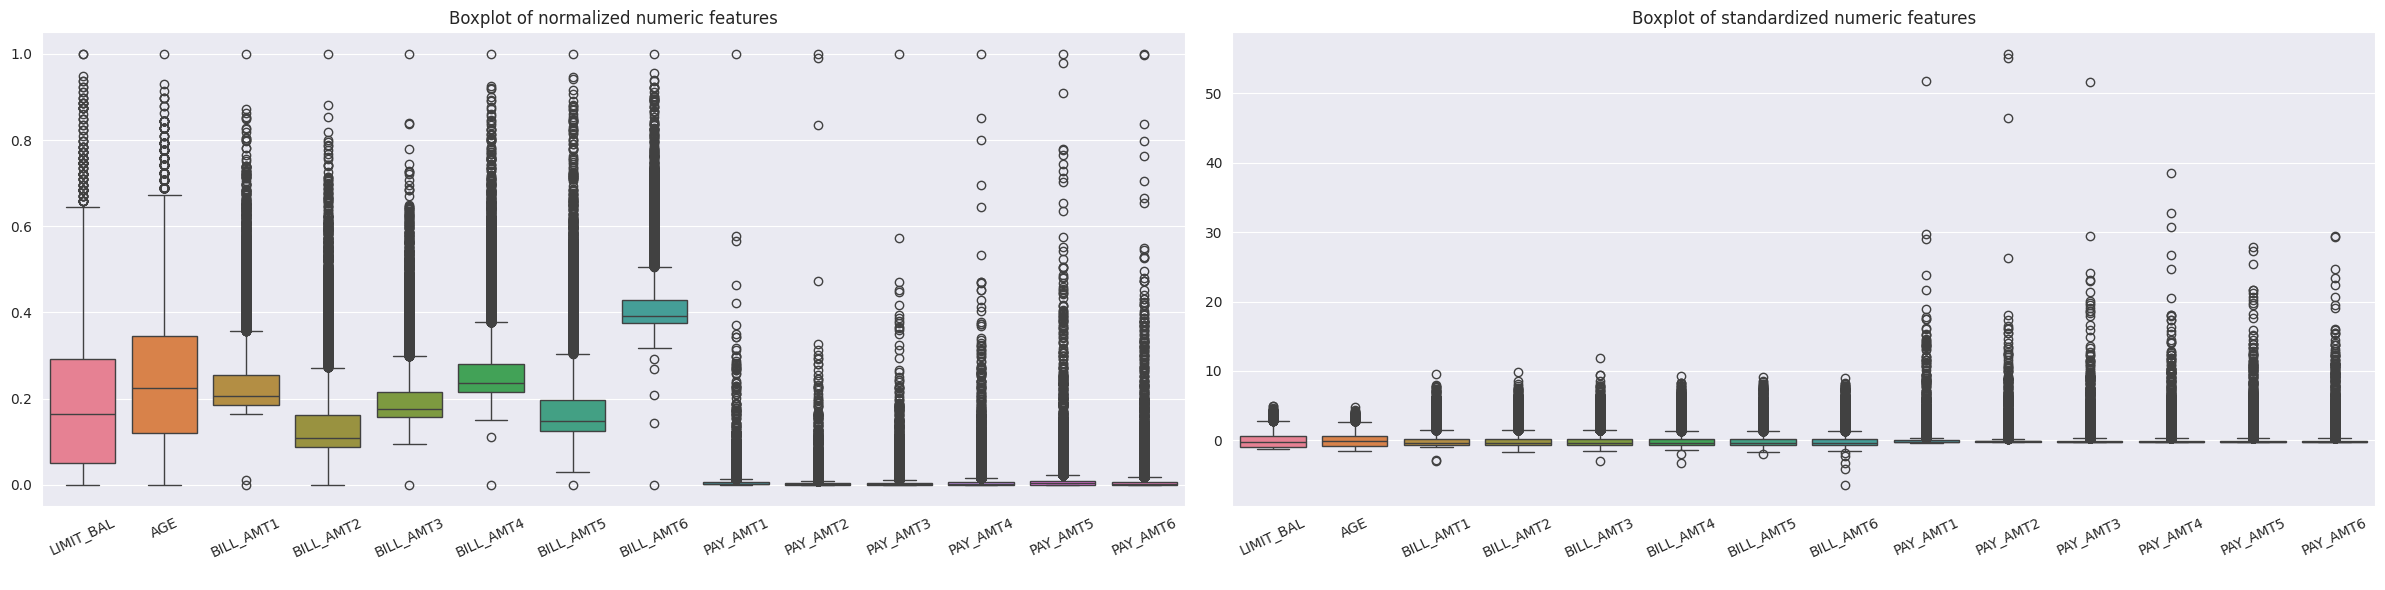

In [45]:
sns.set_color_codes('deep')
numeric = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
fig, axs = plt.subplots(1, 2, figsize=(24,6))

sns.boxplot(data=X_train_norm[numeric], ax=axs[0])
axs[0].set_title('Boxplot of normalized numeric features')
axs[0].set_xticklabels(labels=numeric, rotation=25)
axs[0].set_xlabel(' ')

sns.boxplot(data=X_train_std[numeric], ax=axs[1])
axs[1].set_title('Boxplot of standardized numeric features')
axs[1].set_xticklabels(labels=numeric, rotation=25)
axs[1].set_xlabel(' ')

fig.tight_layout()
#plt.savefig('images/normalized.svg')
plt.show()

Explained Variance

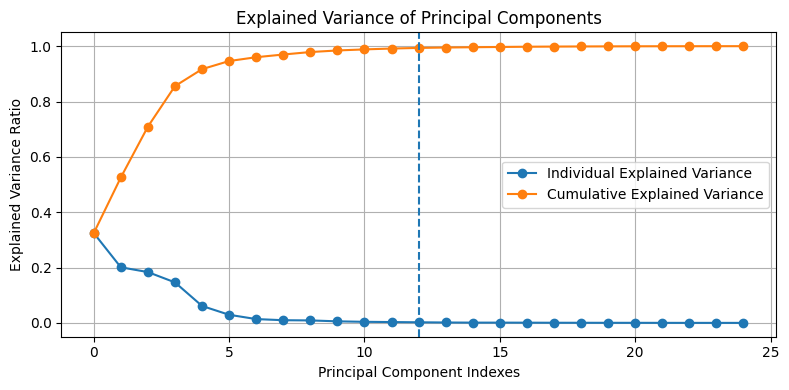

In [47]:
pc = len(X_train_norm.columns.values) #number columns = 25
pca = PCA(n_components=pc)
pca.fit(X_train_norm)

sns.reset_orig()
sns.set_color_codes('pastel')
plt.figure(figsize = (8,4))
plt.grid()
plt.title('Explained Variance of Principal Components')
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.legend(["Individual Explained Variance", "Cumulative Explained Variance"])
plt.xlabel('Principal Component Indexes')
plt.ylabel('Explained Variance Ratio')
#plt.savefig("images/PCACumulative.svg")
plt.tight_layout()
plt.axvline(12, 0, ls='--')
plt.show()

In [48]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
indexes = ['PC' + str(i) for i in range(1, pc+1)]
cumsum_df = pd.DataFrame(data=cumsum, index=indexes, columns=['var1'])
cumsum_df['var2'] = pd.Series([round(val, 4) for val in cumsum_df['var1']], index = cumsum_df.index)
cumsum_df['Cumulative Explained Variance'] = pd.Series(["{0:.2f}%".format(val * 100) for val in cumsum_df['var2']], index = cumsum_df.index)
cumsum_df = cumsum_df.drop(['var1','var2'], axis=1, inplace=False)
cumsum_df.T.iloc[:,:15]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Cumulative Explained Variance,32.46%,52.56%,70.93%,85.57%,91.69%,94.63%,96.01%,96.98%,97.88%,98.44%,98.84%,99.14%,99.36%,99.51%,99.61%


In [49]:
pc = 12
pca = PCA(n_components=pc)
pca.fit(X_train_norm)
X_train = pd.DataFrame(pca.transform(X_train_norm))
X_test = pd.DataFrame(pca.transform(X_test_norm))
X_train.columns = ['PC' + str(i) for i in range(1, pc+1)]
X_test.columns = ['PC' + str(i) for i in range(1, pc+1)]
X_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.541856,-0.551393,-0.412480,0.122101,0.238448,0.715080,-0.118730,-0.217807,0.089929,0.010003,-0.012406,-0.002596
1,-0.499287,-0.532587,-0.456984,0.088489,-0.464270,0.046294,-0.005356,-0.012562,0.043945,0.027395,0.004628,0.006394
2,0.832777,-0.331479,-0.471075,-0.018672,0.173999,0.077012,-0.117121,-0.145521,-0.023793,0.052872,0.009305,-0.071040
3,0.863633,-0.282837,-0.492387,-0.059972,-0.293545,-0.108782,0.099432,-0.142524,0.090122,0.036494,0.002218,0.010245
4,-0.474527,-0.631709,0.548848,0.022170,-0.370284,0.012118,0.082537,-0.129728,-0.140121,-0.031074,0.067107,0.071883


from matplotlib import pyplot as plt
_df_0['PC1'].plot(kind='hist', bins=20, title='PC1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['PC2'].plot(kind='hist', bins=20, title='PC2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['PC3'].plot(kind='hist', bins=20, title='PC3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['PC4'].plot(kind='hist', bins=20, title='PC4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='PC1', y='PC2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='PC2', y='PC3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='PC3', y='PC4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='PC4', y='PC5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['PC1'].plot(kind='line', figsize=(8, 4), title='PC1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['PC2'].plot(kind='line', figsize=(8, 4), title='PC2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['PC3'].plot(kind='line', figsize=(8, 4), title='PC3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['PC4'].plot(kind='line', figsize=(8, 4), title='PC4')
plt.gca().spines[['top', 'right']].set_visible(False)

Dealing with Class Imbalance

In [57]:
class_count = [y_train[y_train == 0].count(), y_train[y_train == 1].count()]
class_count_df = pd.DataFrame(data=class_count, index=['Non-defaulters', 'Defaulters'], columns=['Number'])
class_count_df['var2'] = pd.Series([round(val/class_count_df['Number'].sum(axis=0), 4) for val in class_count_df['Number']], index = class_count_df.index)
class_count_df['Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in class_count_df['var2']], index = class_count_df.index)
class_count_df = class_count_df.drop(['var2'], axis=1, inplace=False)
print('Training set class proportion')
class_count_df

Training set class proportion


,Number,Percentage
Non-defaulters,17246,77.68%
Defaulters,4954,22.32%


In [64]:
oversample = ClusterCentroids(random_state=24)
X_train_cc, y_train_cc = oversample.fit_resample(X_train, y_train)

In [65]:
class_count = [y_train_cc[y_train_cc == 0].count(), y_train_cc[y_train_cc == 1].count()]
class_count_df = pd.DataFrame(data=class_count, index=['Non-defaulters', 'Defaulters'], columns=['Number'])
class_count_df['var2'] = pd.Series([round(val/class_count_df['Number'].sum(axis=0), 4) for val in class_count_df['Number']], index = class_count_df.index)
class_count_df['Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in class_count_df['var2']], index = class_count_df.index)
class_count_df = class_count_df.drop(['var2'], axis=1, inplace=False)
print('Training set class proportion after Cluster Centroid Undersampling')
class_count_df

# non-defaulters 4954
# defaulters 4954

Training set class proportion after Cluster Centroid Undersampling


,Number,Percentage
Non-defaulters,4954,50.00%
Defaulters,4954,50.00%


Synthetic Minority Oversampling Technique

In [59]:
oversample = SMOTE(random_state=24)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [60]:
class_count = [y_train_smote[y_train_smote == 0].count(), y_train_smote[y_train_smote == 1].count()]
class_count_df = pd.DataFrame(data=class_count, index=['Non-defaulters', 'Defaulters'], columns=['Number'])
class_count_df['var2'] = pd.Series([round(val/class_count_df['Number'].sum(axis=0), 4) for val in class_count_df['Number']], index = class_count_df.index)
class_count_df['Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in class_count_df['var2']], index = class_count_df.index)
class_count_df = class_count_df.drop(['var2'], axis=1, inplace=False)
print('Training set class proportion after SMOTE Oversampling')
class_count_df

# non-defaulters 17246
# defaulters 17246

Training set class proportion after SMOTE Oversampling


,Number,Percentage
Non-defaulters,17246,50.00%
Defaulters,17246,50.00%


In [61]:
oversample = KMeansSMOTE(cluster_balance_threshold=0.00001, random_state=24)
X_train_ksmote, y_train_ksmote = oversample.fit_resample(X_train, y_train)

In [62]:
class_count = [y_train_ksmote[y_train_ksmote == 0].count(), y_train_ksmote[y_train_ksmote == 1].count()]
class_count_df = pd.DataFrame(data=class_count, index=['Non-defaulters', 'Defaulters'], columns=['Number'])
class_count_df['var2'] = pd.Series([round(val/class_count_df['Number'].sum(axis=0), 4) for val in class_count_df['Number']], index = class_count_df.index)
class_count_df['Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in class_count_df['var2']], index = class_count_df.index)
class_count_df = class_count_df.drop(['var2'], axis=1, inplace=False)
print('Training set class proportion after K-means SMOTE Oversampling')
class_count_df

Training set class proportion after K-means SMOTE Oversampling


,Number,Percentage
Non-defaulters,17246,49.99%
Defaulters,17252,50.01%


# **Classification** **Model**
***Logistic Regression***

In [88]:
# Plots a barchart with the F1 results and a confusion matrix on the best estimator with the best preprocessing technique
def plot_summary(result, resampling_names, y_pred, y_test):

    fig = plt.figure(constrained_layout=False,figsize=(14,4))
    gs1 = fig.add_gridspec(nrows=1, ncols=6, left=0.1, right=0.90, wspace=0.5, hspace=0.5)
    ax1 = fig.add_subplot(gs1[0,0:3])
    ax2 = fig.add_subplot(gs1[0,3:5])

    plot_x = []
    plot_y = []

    for i in range(len(result)):
        plot_x.append(result[i])
        plot_y.append(resampling_names[i])

    temp_df = pd.DataFrame({'x':plot_x, 'y':plot_y}).sort_values(['x'], ascending=False)

    # plot barchart
    sns.barplot(data=temp_df, x='x',y='y',
                palette='Greens_r',
                ax=ax1)
    ax1.set_xlabel("F1-score", fontsize="14")
    ax1.set_ylabel("")
    ax1.set_yticklabels(temp_df.y,fontsize=13)

    # confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True,
                cmap=plt.cm.Greens,
                annot_kws={"size": 14},
                linecolor = 'w',
                linewidth = 4,ax=ax2,
                fmt='d'
               )

    ax2.set_xlabel("Predicted labels",fontsize="14")
    ax2.set_ylabel("True labels",fontsize="14")

    return plt


def plot_test_scores(model, oversample, plot):

    if oversample == 'raw':
        X_test_s = X_test_norm.copy()
    else:
        X_test_s = X_test.copy()

    # predict
    y_pred = model.predict(X_test_s)

    # various tests
    test_acc = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    test_auc = auc(recall, precision)
    test_f1 = f1_score(y_test, y_pred)

    #print on console
    print("Test Scores:")
    print(f"- Accuracy:\t{test_acc}")
    print(f"- Recall:\t{test_recall}")
    print(f"- Precision:\t{test_precision}")
    print(f"- F1-score:\t{test_f1}")
    print(f"- AUC:\t\t{test_auc}")

    #plot results
    if plot:
        fig, axs = plt.subplots(1, 3, figsize=(15,4))

        tmp = pd.DataFrame({'Feature': X_test_s.columns,
                            'Feature importance': model.best_estimator_.feature_importances_})
        tmp = tmp.sort_values(by='Feature importance', ascending=False)
        s = sns.barplot(x='Feature', y='Feature importance', data=tmp, ax=axs[0])
        s.set_xticklabels(s.get_xticklabels(), rotation=90)

        #ConfusionMatrixDisplay(model, X_test_s, y_test, cmap=plt.cm.Greens, normalize='true', ax=axs[1])
        no_skill = len(y_test[y_test==1]) / len(y_test)
        #plot_precision_recall_curve(model, X_test_s, y_test, ax=axs[2])
        plt.axhline(no_skill, 0, ls='--', label='No Skill')
        plt.ylim([-0.05, 1.05])
        axs[2].legend(loc = 'upper right')
        plt.show()
    else:
        fig, axs = plt.subplots(1, 2, figsize=(10,4))
        #ConfusionMatrixDisplay(model, X_test_s, y_test, cmap=plt.cm.Greens, normalize='true', ax=axs[0])
        no_skill = len(y_test[y_test==1]) / len(y_test)
        #plot_precision_recall_curve(model, X_test_s, y_test, ax=axs[1])
        plt.axhline(no_skill, 0, ls='--', label='No Skill')
        plt.ylim([-0.05, 1.05])
        axs[1].legend(loc = 'upper right')
        plt.show()

    return test_acc, test_recall, test_precision, test_f1, test_auc


def pipeline(model, params, oversample=None, plot=False):

    max_f1 = 0
    y_pred_max = 0
    y_test_max = 0

    if oversample:
        if oversample == 'raw': #without PCA
            X_train_s = X_train_norm.copy() #original data scaled
            y_train_s = y_train.copy()
            X_test_f1 = X_test_raw.copy()
        else:
            X_train_s, y_train_s = oversample.fit_resample(X_train, y_train)
            X_test_f1 = X_test.copy()
    else:
        X_train_s = X_train.copy() #with PCA without resampling
        y_train_s = y_train.copy()
        X_test_f1 = X_test.copy()

    #gridsearch best parameter
    gridsearch = GridSearchCV(estimator = model,
                      param_grid = params,
                      scoring = 'f1',
                      cv = 5,
                      n_jobs = -1,
                      verbose = True)
    gridsearch.fit(X_train_s, y_train_s)
    print(f"Best parameters:\t{gridsearch.best_params_}")
    print(f"Best validation score:\t{gridsearch.best_score_}")

    test_scores = plot_test_scores(gridsearch, oversample, plot)

    best_estimator = gridsearch.best_estimator_

    # save best config
    y_pred = best_estimator.predict(X_test_f1)
    f1 = round(f1_score(y_test, y_pred),2)

    if f1 > max_f1:
        y_pred_max = y_pred
        y_test_max = y_test
        max_f1 = f1

    return test_scores, y_pred_max, y_test_max

In [89]:
oversample_method = ['raw',
                     None,
                     SMOTE(random_state=24)
]
oversample_names = ['Raw data',
                    'PCA',
                    'PCA + SMOTE oversampling']
scores_lr = {'Accuracy' : [float for i in range(len(oversample_method))],
             'Recall' : [float for i in range(len(oversample_method))],
             'Precision' : [float for i in range(len(oversample_method))],
             'F1-score' : [float for i in range(len(oversample_method))],
             'AUC' : [float for i in range(len(oversample_method))],}

Logistic Regression with Raw data
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:	{'C': 100.0}
Best validation score:	0.27946732816436864
Test Scores:
- Accuracy:	0.8048912309147412
- Recall:	0.19624470018170806
- Precision:	0.7346938775510204
- F1-score:	0.30975143403441685
- AUC:		0.5551193361572708


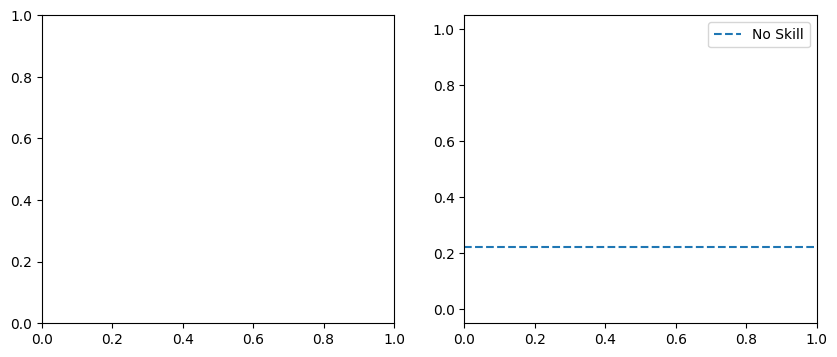

Logistic Regression with PCA
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:	{'C': 100.0}
Best validation score:	0.27924371052935976
Test Scores:
- Accuracy:	0.8042156465342521
- Recall:	0.19200484554815264
- Precision:	0.7337962962962963
- F1-score:	0.3043686989918387
- AUC:		0.5530235272794735


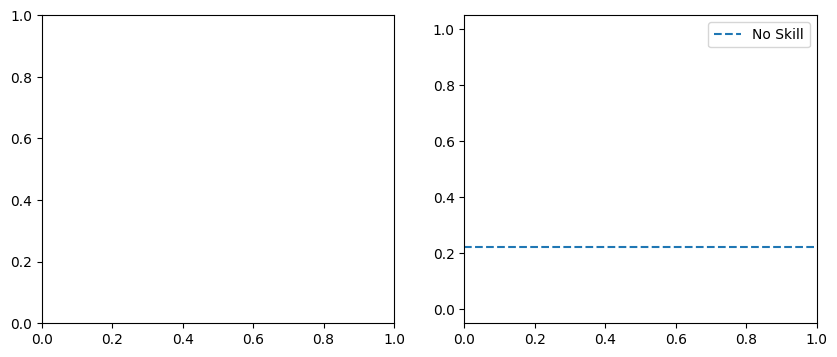

Logistic Regression with PCA + SMOTE oversampling
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:	{'C': 1.0}
Best validation score:	0.663015565520895
Test Scores:
- Accuracy:	0.6319416295095257
- Recall:	0.6795881284070261
- Precision:	0.3382574615616521
- F1-score:	0.45169082125603865
- AUC:		0.5446612087122137


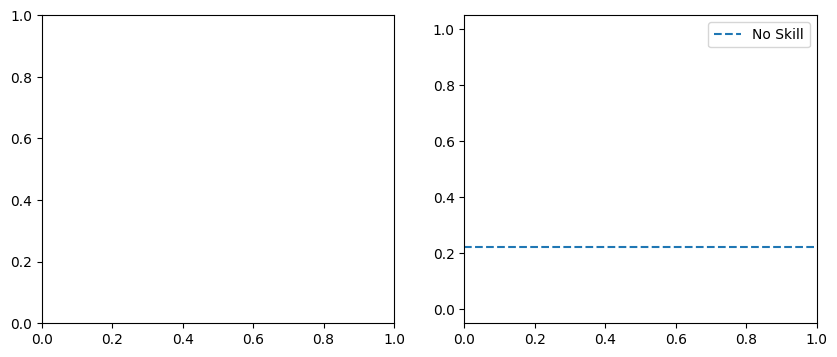

,Accuracy,Recall,Precision,F1-score,AUC
Raw data,0.804891,0.196245,0.734694,0.309751,0.555119
PCA,0.804216,0.192005,0.733796,0.304369,0.553024
PCA + SMOTE oversampling,0.631942,0.679588,0.338257,0.451691,0.544661


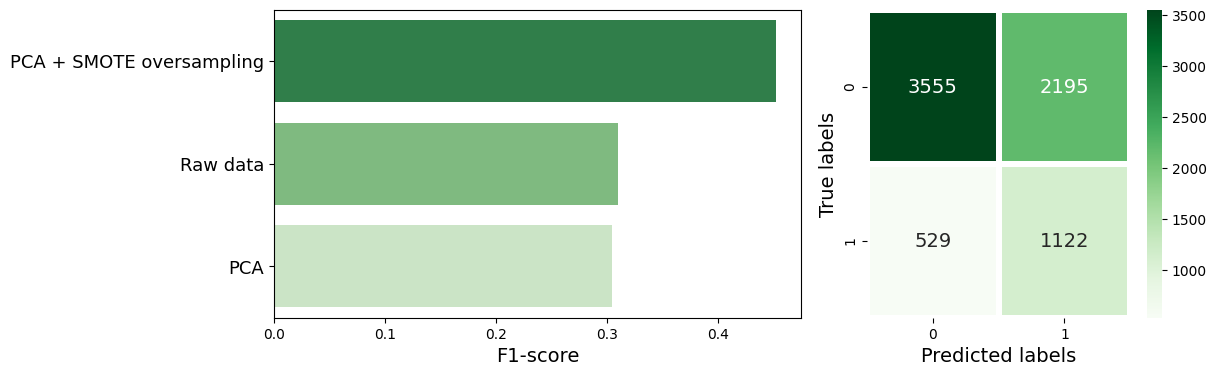

In [90]:
params_lr = {'C': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}
for idx, oversample in enumerate(oversample_method):
    print(f"Logistic Regression with {oversample_names[idx]}")
    scores, y_pred_max, y_test_max = pipeline(LogisticRegression(random_state=24, max_iter=1000, n_jobs=-1),
                                              params_lr,
                                              oversample)
    scores_lr['Accuracy'][idx] = scores[0]
    scores_lr['Recall'][idx] = scores[1]
    scores_lr['Precision'][idx] = scores[2]
    scores_lr['F1-score'][idx] = scores[3]
    scores_lr['AUC'][idx] = scores[4]

scores_lr_df = pd.DataFrame(data=scores_lr, index=oversample_names)
plot = plot_summary(scores_lr_df["F1-score"], oversample_names, y_pred_max, y_test_max)
#plot.savefig("images/summaryLogReg.svg")
scores_lr_df

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_AMT4  

Encoding on the other categorical attributes one hot encoding

In [97]:
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X = X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns = new_columns, index = X.index)
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}_{self.categories_[i][j]}')
                j += 1
        return new_columns

In [98]:
cat_features = ['MARRIAGE', 'EDUCATION', 'SEX']
encoder = OneHotEncoder()
encoder_cols = encoder.fit_transform(df[cat_features])

In [99]:
encoder_cols.head()

,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,SEX_1,SEX_2
ID,,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [100]:
df_final = pd.concat([df, encoder_cols], axis=1)

In [101]:
df_final.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'SEX_1',
       'SEX_2'],
      dtype='object')

In [105]:
list_of_x_column = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
       , 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'SEX_1',
       'SEX_2']

In [110]:
y_column = ['default payment next month']

In [107]:
df_final.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
MARRIAGE_0                    0
MARRIAGE_1                    0
MARRIAGE_2                    0
MARRIAGE_3                    0
EDUCATION_0                   0
EDUCATION_1                   0
EDUCATION_2                   0
EDUCATIO

In [108]:
df_final = df_final.dropna()
df_final.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
MARRIAGE_0                    0
MARRIAGE_1                    0
MARRIAGE_2                    0
MARRIAGE_3                    0
EDUCATION_0                   0
EDUCATION_1                   0
EDUCATION_2                   0
EDUCATIO

In [111]:
# Traiin test split of dataframe

from sklearn.model_selection import train_test_split

# Putting feature variables into X
X = df_final[list_of_x_column]
print("the shape of X datafrae :",X.shape)
# Putting target variable to y
y = df_final[y_column]
print("the shape of X datafrae :",y.shape)

the shape of X datafrae : (30000, 36)
the shape of X datafrae : (30000, 1)


In [112]:
# Splitting data into train and test set 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [113]:
adult_train_data = pd.concat([X_train,y_train],axis=1)
adult_train_data.shape

(24000, 37)

In [114]:
adult_train_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,SEX_1,SEX_2,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
21754,80000,2,2,2,24,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
252,30000,1,2,2,28,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
22942,180000,2,5,1,44,0,0,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
619,60000,1,1,2,25,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
17091,130000,2,2,2,25,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [115]:
adult_test_data = pd.concat([X_test,y_test],axis=1)
adult_test_data.shape

(6000, 37)

In [116]:
adult_test_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,SEX_1,SEX_2,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
2309,30000,1,2,2,25,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
22405,150000,2,1,2,26,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23398,70000,2,3,1,32,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
25059,130000,1,3,2,49,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2665,50000,2,2,2,36,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [117]:
# Importing XGBoost
from xgboost import XGBClassifier

# Importing libraries for cross validation- Hyperparameter Tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [118]:
y_train.value_counts()

default payment next month
0                             18677
1                              5323
Name: count, dtype: int64

In [119]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.6],
             'subsample': [0.3, 0.45, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=4, n_estimators=150)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=4,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=150,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.6],
                         'subsample': [0.3, 0.45, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [120]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.418507,2.708378,0.033349,0.001158,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.782233,0.779047,0.765527,0.775603,0.007242,4,0.845098,0.842687,0.846995,0.844927,0.001763
1,0.509174,0.017705,0.032094,0.000412,0.1,0.45,"{'learning_rate': 0.1, 'subsample': 0.45}",0.781282,0.781560,0.770047,0.777630,0.005363,3,0.849735,0.848429,0.854801,0.850988,0.002748
2,0.505817,0.010986,0.034213,0.001580,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.781981,0.783367,0.770620,0.778656,0.005710,2,0.854512,0.851025,0.853994,0.853177,0.001536
3,0.478621,0.015302,0.033542,0.002142,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.782979,0.783228,0.769764,0.778657,0.006289,1,0.855973,0.851731,0.856059,0.854588,0.002020
4,1.135530,0.703604,0.047987,0.021557,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.765657,0.768959,0.758699,0.764438,0.004276,8,0.869117,0.868052,0.870027,0.869065,0.000807
5,0.499105,0.015351,0.032392,0.000670,0.2,0.45,"{'learning_rate': 0.2, 'subsample': 0.45}",0.770331,0.767785,0.757768,0.765294,0.005422,7,0.879734,0.879549,0.881029,0.880104,0.000658
6,0.497844,0.016257,0.034079,0.001556,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.770288,0.774717,0.764177,0.769727,0.004321,6,0.883940,0.882357,0.888415,0.884904,0.002565
7,0.482017,0.008858,0.031864,0.000205,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.776549,0.776941,0.765357,0.772949,0.005371,5,0.892937,0.889343,0.892211,0.891497,0.001552
8,0.501324,0.007824,0.039244,0.009815,0.3,0.3,"{'learning_rate': 0.3, 'subsample': 0.3}",0.742919,0.750875,0.743340,0.745711,0.003655,14,0.875426,0.876986,0.879541,0.877318,0.001696
9,0.503295,0.014717,0.033783,0.000651,0.3,0.45,"{'learning_rate': 0.3, 'subsample': 0.45}",0.752173,0.753327,0.749949,0.751816,0.001402,12,0.894714,0.893730,0.893809,0.894084,0.000447


In [121]:
model_cv.best_params_

{'learning_rate': 0.1, 'subsample': 0.9}

In [122]:
params = {'learning_rate': 0.2,
          'max_depth': 4,
          'n_estimators':150,
          'subsample':0.45,
         'objective':'binary:logistic'}

# fit model on training data
xgb_hot_encoder_model = XGBClassifier(params = params)
xgb_hot_encoder_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150,
                      'objective': 'binary:logistic', 'subsample': 0.45}, ...)

In [123]:
# Predictions on the train set
y_train_pred = xgb_hot_encoder_model.predict(X_train)

In [124]:
# Predictions on the test set
y_test_pred = xgb_hot_encoder_model.predict(X_test)

In [125]:
test = pd.concat((X_test,y_test), axis =1)
test_with_pred = pd.concat((test,pd.DataFrame(y_test_pred)), axis =1)
test_with_pred.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,SEX_1,SEX_2,default payment next month,0
2309,30000.0,1.0,2.0,2.0,25.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22405,150000.0,2.0,1.0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
23398,70000.0,2.0,3.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
25059,130000.0,1.0,3.0,2.0,49.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2665,50000.0,2.0,2.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [126]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18266   411]
 [ 2314  3009]]


In [127]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.8864583333333333
Sensitivity:- 0.565282735299643
Specificity:- 0.9779943245703271
F1-Score:- 0.6883220862404209


In [129]:
# Predicted probability
y_train_pred_proba_xgb_hot_encoder = xgb_hot_encoder_model.predict_proba(X_train)[:,1]

In [130]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_xgb_hot_encoder)
auc

0.9431390773577867

In [131]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

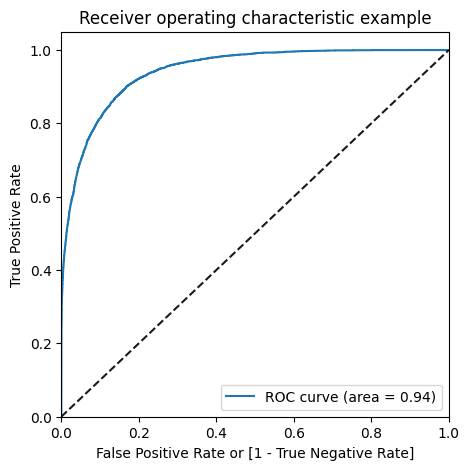

In [132]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_xgb_hot_encoder)

In [133]:
# Get feature importance (default method is 'gain')
feature_importances = xgb_hot_encoder_model.get_booster().get_score(importance_type='gain')

# Convert importance to a pandas Series for easy manipulation
feature_importance_series = pd.Series(feature_importances, index=xgb_hot_encoder_model.feature_names_in_)

# Sort features by importance in descending order and select top 10
top_10_features = feature_importance_series.sort_values(ascending=False)[:10].index.tolist()

print("Top 10 Important Features:")
for feature in top_10_features:
    print(feature)

Top 10 Important Features:
PAY_0
PAY_2
PAY_3
PAY_5
PAY_4
PAY_6
MARRIAGE_2
MARRIAGE_1
PAY_AMT3
EDUCATION


# XAI library **SHAP**

In [134]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.0 MB/s eta 0:00:00


In [135]:
import shap
import xgboost
shap.initjs()

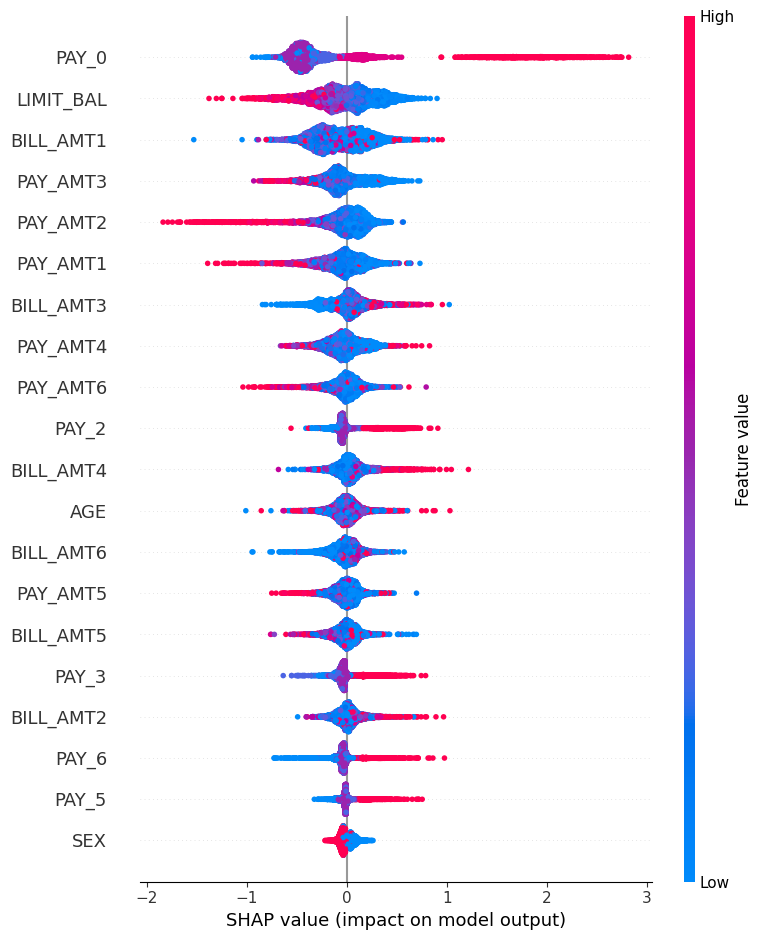

In [136]:


# Assuming you have a trained XGBoost model named xgb_model1 and your input data is in X_test
# Make sure your X_test is a pandas DataFrame or a NumPy array

# Create a SHAP explainer using the XGBoost model
explainer = shap.Explainer(xgb_hot_encoder_model)

# Calculate SHAP values for a subset of the data (you can adjust the number of samples)
shap_values1 = explainer.shap_values(X_test)

# Plot summary plot (summary_plot) to visualize feature importances
shap.summary_plot(shap_values1, X_test, show = False)

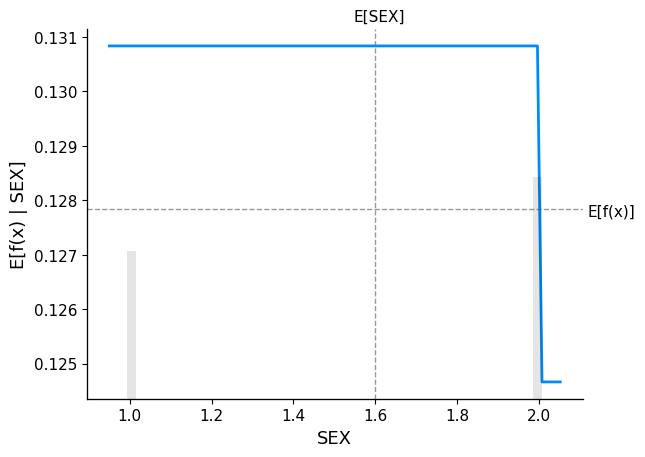

In [138]:
X_test_sample = shap.utils.sample(X_test, 10000)

shap.partial_dependence_plot(
    "SEX",
    xgb_hot_encoder_model.predict,
    X_test_sample,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

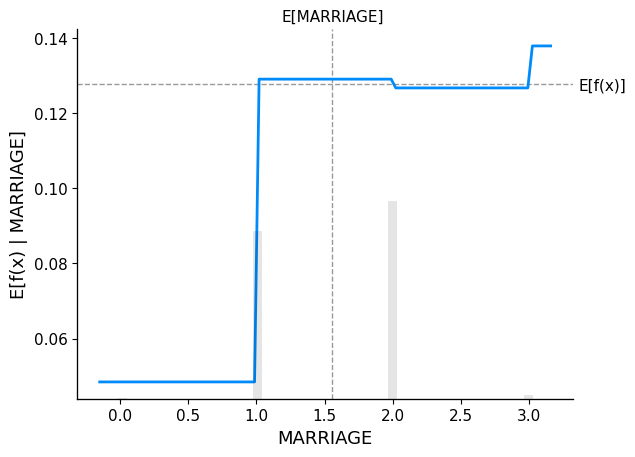

In [139]:
shap.partial_dependence_plot(
    "MARRIAGE",
    xgb_hot_encoder_model.predict,
    X_test_sample,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

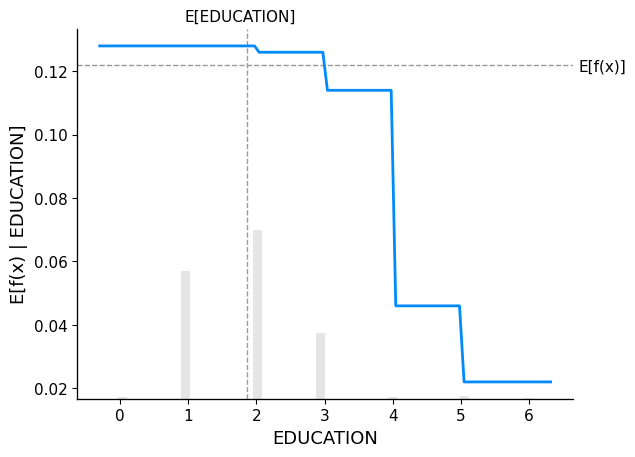

In [140]:
X_test_sample = shap.utils.sample(X_test, 500)

shap.partial_dependence_plot(
    "EDUCATION",
    xgb_hot_encoder_model.predict,
    X_test_sample,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

In [141]:
# If you want to visualize the impact of a single prediction, you can use force_plot
# Select a specific instance (change the index accordingly)
shap.initjs()
instance_index = 3
shap.force_plot(explainer.expected_value, shap_values1[instance_index, :], X_test.iloc[instance_index, :], show=False)